----------------------------------------------------------------------------
	SCS v1.2.6 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012-2016
----------------------------------------------------------------------------
Lin-sys: sparse-indirect, nnz in A = 114992, CG tol ~ 1/iter^(2.00)
eps = 1.00e-03, alpha = 1.50, max_iters = 2500, normalize = 1, scale = 1.00
Variables n = 63150, constraints m = 73400
Cones:	primal zero / dual free vars: 31460
	linear vars: 15375
	sd vars: 26565, sd blks: 1
Setup time: 1.77e-02s
----------------------------------------------------------------------------
 Iter | pri res | dua res | rel gap | pri obj | dua obj | kap/tau | time (s)
----------------------------------------------------------------------------
     0|      inf       inf       nan      -inf       inf       inf  1.06e-01 
   100| 1.34e-03  9.50e-04  1.48e-03  2.76e+05  2.77e+05  1.38e-10  2.83e+00 
   140| 9.91e-04  3.64e-04  3.72e-04  2.75e+05  2.75e+05  1.39e-10

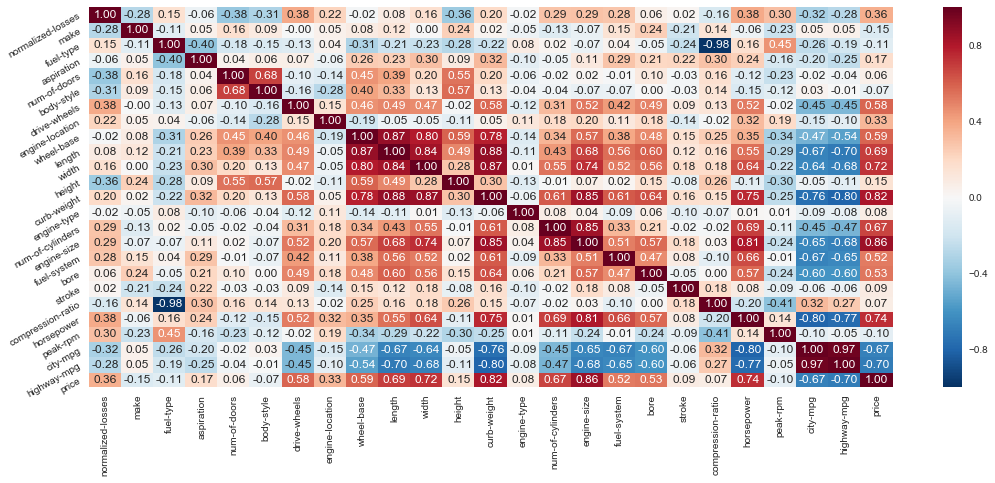

In [1]:
from AutomobileRead import AutomobileRead
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

ar = AutomobileRead()
df = ar.automobile

import seaborn as sns
df = ar.GetImputedDataframe(ar.DoCategorizeFrom(df), impute_type='nnm')
corr = df.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(18,7))
a = sns.heatmap(corr, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

In [2]:
from Regressions import Regressions
r = Regressions(n_iteration=10, impute_type='nnm')
res = r.DoBatchPredict()

----------------------------------------------------------------------------
	SCS v1.2.6 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012-2016
----------------------------------------------------------------------------
Lin-sys: sparse-indirect, nnz in A = 114992, CG tol ~ 1/iter^(2.00)
eps = 1.00e-03, alpha = 1.50, max_iters = 2500, normalize = 1, scale = 1.00
Variables n = 63150, constraints m = 73400
Cones:	primal zero / dual free vars: 31460
	linear vars: 15375
	sd vars: 26565, sd blks: 1
Setup time: 1.42e-02s
----------------------------------------------------------------------------
 Iter | pri res | dua res | rel gap | pri obj | dua obj | kap/tau | time (s)
----------------------------------------------------------------------------
     0|      inf       inf       nan      -inf       inf       inf  3.15e-02 
   100| 1.34e-03  9.50e-04  1.48e-03  2.76e+05  2.77e+05  1.38e-10  2.81e+00 
   140| 9.91e-04  3.64e-04  3.72e-04  2.75e+05  2.75e+05  1.39e-10

In [3]:
print(res)

[('LinearRegression', 8764.683767612467), ('Ridge', 8929.00880085691), ('KernelRidgeLinear', 9702.792196266624), ('KernelRidgeRBF', 9241.099307406474), ('GPR', 9511.230603525786)]


LinearRegression
CV Fold-1, MSE: 170.343094499
CV Fold-2, MSE: 209.160418055
CV Fold-3, MSE: 217.443936251
CV Fold-4, MSE: 160.853207954
CV Fold-5, MSE: 147.765241789
TOTAL MSE: 905.565898548


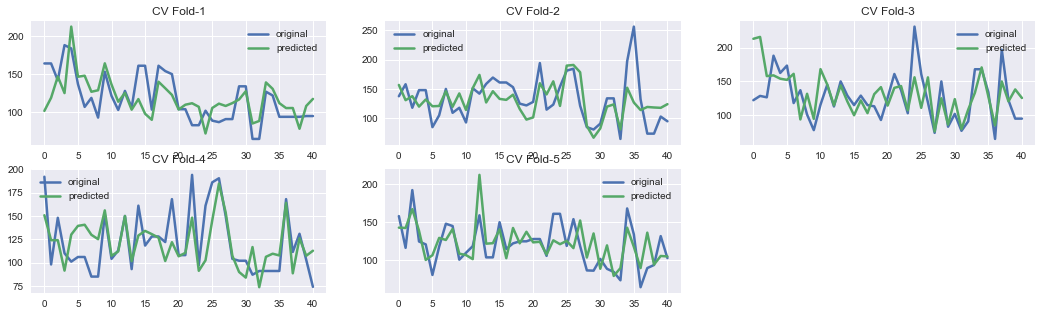

Ridge
CV Fold-1, MSE: 136.633234186
CV Fold-2, MSE: 159.445963412
CV Fold-3, MSE: 220.021175944
CV Fold-4, MSE: 182.428802722
CV Fold-5, MSE: 189.412840241
TOTAL MSE: 887.942016505


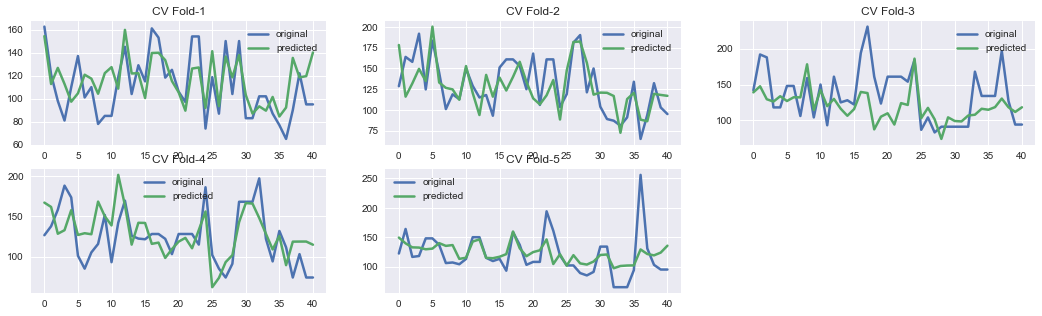

KernelRidgeLinear
CV Fold-1, MSE: 169.858954478
CV Fold-2, MSE: 224.921247461
CV Fold-3, MSE: 162.145809533
CV Fold-4, MSE: 153.978580841
CV Fold-5, MSE: 193.160409912
TOTAL MSE: 904.065002226


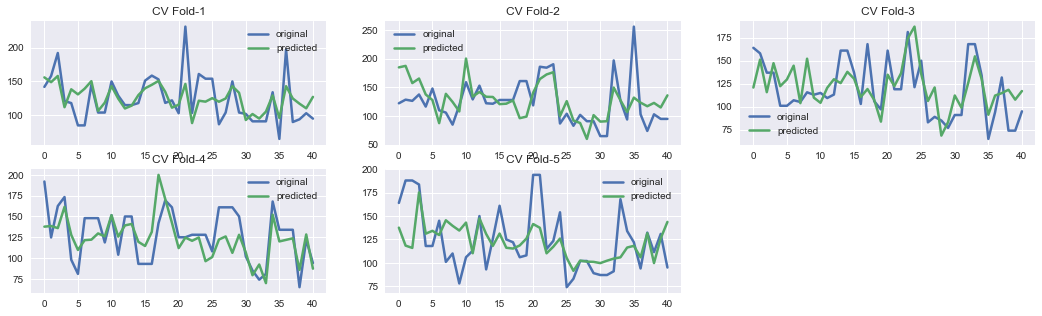

KernelRidgeRBF
CV Fold-1, MSE: 222.088981897
CV Fold-2, MSE: 150.365175096
CV Fold-3, MSE: 190.352209319
CV Fold-4, MSE: 198.699307857
CV Fold-5, MSE: 274.302928826
TOTAL MSE: 1035.808603


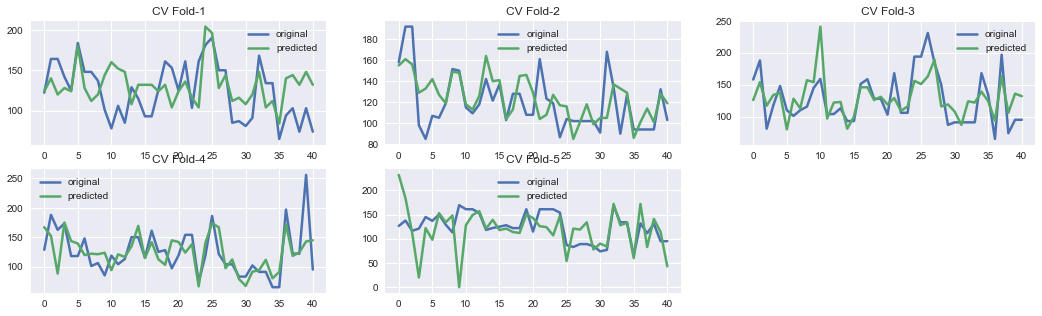

GPR
CV Fold-1, MSE: 185.274954913
CV Fold-2, MSE: 194.643079116
CV Fold-3, MSE: 225.740329793
CV Fold-4, MSE: 189.216287202
CV Fold-5, MSE: 173.368125442
TOTAL MSE: 968.242776466


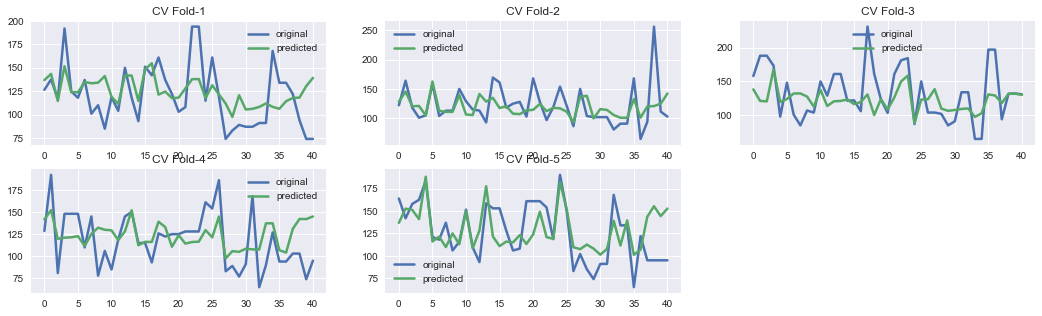

In [4]:
for regr in r.regrs:
    r.CheckPlot(regr=regr)